<a href="https://colab.research.google.com/github/Kristina140699/DataScienceProjects/blob/main/Intermediate/Project_on_Indian_food_analysisEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive #mounting my G-drive to G-colab
drive.mount('/content/drive')

Mounted at /content/drive


#Dataset Details:

The dataset consists of about **255** Indian dishes and **9** columns associated with each of them.

The **9** columns are as follows:-

**name** : name of the dish

**ingredients** : main ingredients used

**diet** : type of diet - either vegetarian or non vegetarian

**prep_time** : preparation time

**cook_time** : cooking time

**flavor_profile** : flavor profile includes whether the dish is spicy, sweet, bitter, etc

**course** : course of meal - starter, main course, dessert, etc

**state** : state where the dish is famous or is originated

**region** : region where the state belongs


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Learning..../Data/Project /indian_food.csv")

In [4]:
data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [5]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [7]:
data.shape

(255, 9)

In [6]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [9]:
data.isnull().any()

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [10]:
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [11]:
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)


In [12]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [13]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [14]:
data.shape

(255, 9)

In [15]:
pie_data = data.diet.value_counts().reset_index()


In [16]:
pie_data.columns = ['diet','count']
fig = px.pie(pie_data, values='count', names='diet', title='Proportion of Vegetarian and Non-Vegetarian dishes',
             color_discrete_sequence=['green', 'red'])
fig.show()

In [18]:
pie_data = data.flavor_profile.value_counts().reset_index()

pie_data.columns = ['flavor_profile','count']
fig = px.pie(pie_data, values='count', names='flavor_profile', title='Proportion of flavour of dishes',
             color_discrete_sequence=[ 'red','pink','olive', 'orange'])
fig.show()

In [21]:
#Displaying the same thing with bar graph
flav_data = data.flavor_profile.value_counts().reset_index()
flav_data.columns = ['flavor_profile', 'prep_time']
fig = px.bar(flav_data,x='flavor_profile',y='prep_time',title='variety of item according to the flavour',
color_discrete_sequence=['green'])
fig.show()

In [ ]:
sweet_data = data[data['flavor_profile']=='sweet']
final_sweet_data = sweet_data[sweet_data['course']!='dessert']


In [ ]:
final_sweet_data

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
46,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180.0,60.0,sweet,main course,Karnataka,South
85,Dal makhani,"Red kidney beans, urad dal, cream, garam masal...",vegetarian,10.0,60.0,sweet,main course,Punjab,North
243,Mishti Chholar Dal,"Chana dal, fresh coconut, ginger, cinnamon, ra...",vegetarian,10.0,30.0,sweet,main course,West Bengal,East


In [24]:
cooking_time= data[['cook_time','name']]
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


In [28]:
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)
ten_cook_quickly=cooking_time.head(10)
ten_cook_quickly

,cook_time,name
109,2.0,Pani puri
111,5.0,Papad
11,5.0,Lassi
147,5.0,Papadum
212,6.0,Lilva Kachori
78,10.0,Chapati
169,10.0,Bajri no rotlo
195,10.0,Koshimbir
207,10.0,Surnoli
190,10.0,Keri no ras


In [29]:
#cook_data = ten_cook_quickly.cook_time.value_counts().reset_index()
#cook_data.columns = ['cook_time', 'name']
fig = px.bar(ten_cook_quickly,x='cook_time',y='name',title='dishes based on cooking time',
color_discrete_sequence=['green'])
fig.show()

In [30]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [33]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)
tencooking_time_longest=cooking_time_longest.head(10)
tencooking_time_longest

,cook_time,name
62,720.0,Shrikhand
114,120.0,Pindi chana
27,120.0,Malapua
75,120.0,Biryani
130,90.0,Idli
115,90.0,Rajma chaval
128,90.0,Dosa
34,90.0,Rasgulla
142,90.0,Kuzhakkattai
144,90.0,Masala Dosa


In [35]:
fig = px.bar(tencooking_time_longest,x='cook_time',y='name',title='dishes based on cooking time',
color_discrete_sequence=['red'])
fig.show()

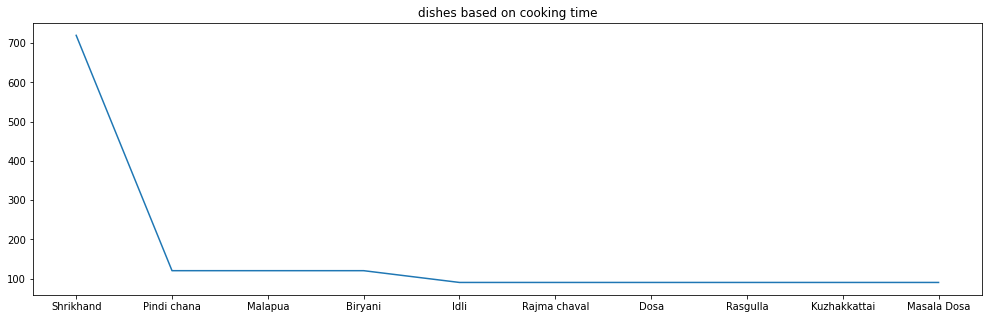

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,5))
y=tencooking_time_longest['cook_time']
x=tencooking_time_longest['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()

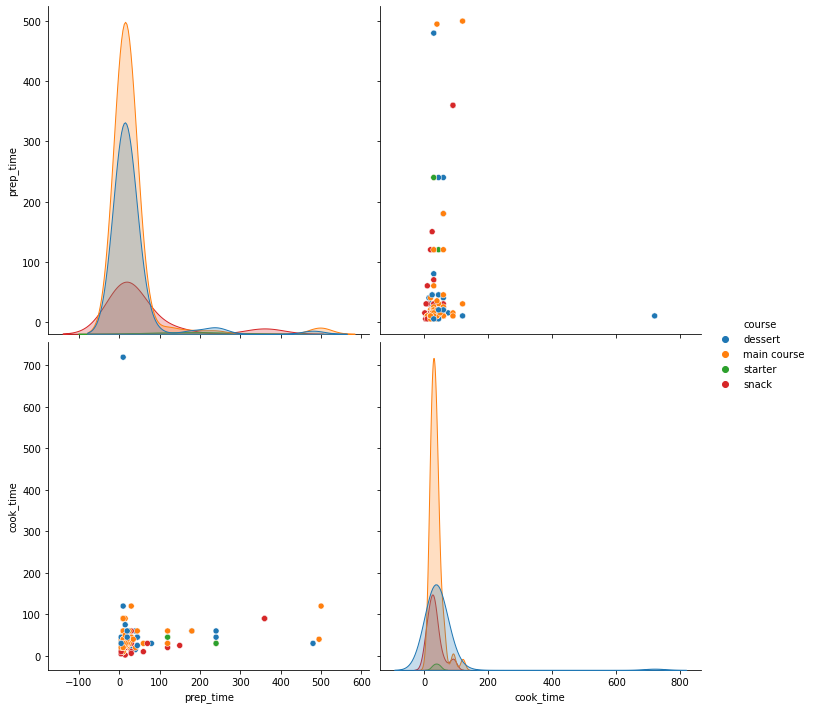

In [47]:
import seaborn as sns
sns.pairplot(data,diag_kind='kde', hue='course', height=5)